# Assessing credit risk with machine learning methods

If you've ever applied for a mortgage, you know that financial firms process your information before making a decision. This is because giving you a mortgage can have a serious financial impact on their business. But how do they make a decision? In this assignment, you will have to prepare mortgage application data. After that, you will apply machine learning and business rules to reduce risk and ensure profitability. You will use a large set of mortgage data that emulates mortgage applications. You will be required to write the code in the boxes after each commented part. 

## Import and clean the data

As usual, the first step is to import and clean }the data. 

### Import the data

Ex 1: You have to first import the ***Data.csv*** file and consider the 'Id' column as the index of the dataframe. Hint: you need the ***pandas*** package to import the data. Once the data are uploaded, to have an idea of the data frame you are required to show the first 10 rows. 

In [1]:
import pandas as pd
df = pd.read_csv("Data.csv", index_col = 0)
df.head(10)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
1,18600,10.99,608.86,B,6 years,RENT,80000.00,Fully Paid,12.92,0.0,...,0.0,0.00,0.0000,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
2,2000,17.97,72.28,D,4 years,MORTGAGE,55400.00,Current,10.62,1.0,...,0.0,0.00,0.0000,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
3,12000,12.29,400.24,C,10+ years,OWN,60000.00,Fully Paid,17.92,0.0,...,0.0,0.00,0.0000,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
4,16000,19.42,589.90,D,7 years,RENT,64000.00,Current,3.90,1.0,...,0.0,0.00,0.0000,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
5,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.00,Fully Paid,19.08,1.0,...,0.0,0.00,0.0000,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0
6,19000,16.99,472.10,D,1 year,RENT,65000.00,Charged Off,15.66,0.0,...,0.0,1863.64,335.4552,472.10,0.0,Individual,0.0,234.0,13167.0,24600.0
7,6000,9.17,191.28,B,10+ years,OWN,147000.00,Fully Paid,4.00,1.0,...,0.0,0.00,0.0000,152.92,0.0,Individual,0.0,381.0,2686.0,12400.0
8,17000,5.32,511.96,A,10+ years,MORTGAGE,75000.00,Current,7.89,0.0,...,0.0,0.00,0.0000,511.96,0.0,Individual,0.0,0.0,191633.0,45700.0
9,26375,24.50,766.43,F,10+ years,MORTGAGE,71596.18,Fully Paid,22.59,0.0,...,0.0,0.00,0.0000,14426.38,0.0,Individual,0.0,510.0,273060.0,19900.0


Ex 2: The variable we want to predict is ***loan_status***. In particular, we want to predict the probability that a mortgage is *Charged Off* from the bank book. Before doing anything, we need to check for the presence of missing data. Notice that the variable ***loan_status*** is a categorical variable. 

In [2]:
df.isna().sum()

loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14611
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med        16
application_type                   0
a

Ex 3: Do we have any missing value for the ***loan_status*** variable? If yes, we should fix it by replacing with the most common category. If not, we should keep it as it is. To avoid any confusion in workflow. Let's save a back-up copy of the dataframe so that we can reuse it if something goes wrong. 

In [3]:
df_backup = df.copy()

### Cleaning the data

Ex 4: There are some other variable in which we do have many *NaN* though. We should clean the data to make sure there will not be any issue when predicting the mortgages which have been charged off. Let us do the cleaning as follows:

- Step 1: Take out from the dataset those variables in which we have more than 10 missing observations. 
- Step 2: Drop only the missing observations for those variables in which we have less than 10 *NaN*. 

In [4]:
# Step 1:

df = df.loc[:, df.isna().sum() < 10]

# Step 2:

df.dropna(axis = 0, how = 'any', inplace = True)

Ex 5: Notice the variable of interest ***loan_status*** is a categorical variable, which means is a string. In order to run our classification algorithms we need to construct a quantitative (binary) variable which takes value 1 if the loan status is *charged off* and zero otherwise. Hint: we need the ***numpy*** package to do that. 

In [9]:
import numpy as np

df["loan_dummy"] = np.where(df["loan_status"].str.contains('Charged Off'), 1, 0)

### Data visualization 

Ex 6: Before moving to the model estimation and assessment part, we want to have a sense of the data we are dealing with. For instance, let us look at the distribution of the loan amount (**loan_amnt**) and the interest rate (**int_rate**) by borrowers credit score (**grade**). The credit score goes from A (high grade) to F (low grade). Hint: use the ***seaborn*** and the ***matplotlib*** packages. 

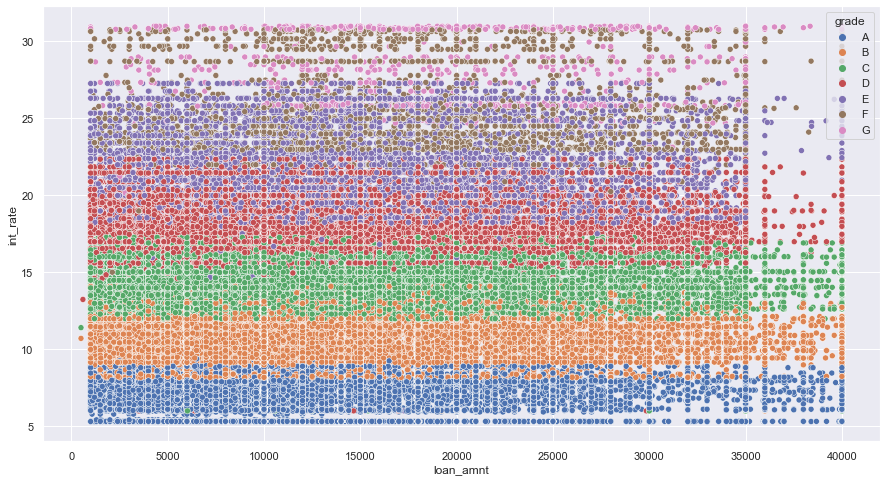

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set(rc = {'figure.figsize':(15,8)})
hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.scatterplot(x="loan_amnt", y="int_rate", hue="grade",hue_order=hue_order, data=df)
plt.savefig("loan_int_grade.png") 

 Do you see any specific patterns? Briefly discuss the results.  

### Sample splitting 

Ex 7: Before estimating the logistic regression and other models, we need to split the sample in *training* vs *testing* observations. Let us consider 70% of the total data as training sample and the remaining as testing period. Notice we are dealing with a binary target variable, so we need to balance out the splitting accordingly. 

Notice the variables we want to use for forecasting are:

- Loan amount (**loan_amnt**)
- Interest rate (**int_rate**)
- Annual income (**annual_inc**)
- Total mortgage payment (**total_pymnt**)
- Mortgage installment (**installment**)
- Total paied in interest rates (**total_rec_int**)
- Last payment amount (**last_pymnt_amnt**)

We can construct our matrix of predictors *X* by taking these variables from the data frame. Recall that the variable of interest here is the binary variable **loan_dummy**. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['loan_dummy']
X = df[['loan_amnt', 'int_rate', 'annual_inc', 'total_pymnt', 'installment', 'total_rec_int', 'last_pymnt_amnt']]

X_backup = X
feature_names = X.columns

X = StandardScaler(with_mean=True).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Estimating a logistic regression 

Ex 8: We now estimate a logistic regression without shrinking the parameters. We estimate the regression using the *training* set of observations. 

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
#initiaise a LogisticRegression object

model.fit(X_train, y_train)
#fit the model using the training data

coef  = model.coef_

# Display the slope coefficients estimates 
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [[ 2.44936657e-04  5.27505468e-01 -1.83545888e-01 -5.21304730e-01
   5.20918892e-01  1.02072635e-01 -6.52892749e+00]]


Ex 9: We can now produce the forecast based on the observations in the testing sample. 

In [9]:
yhat = model.predict(X_test)

Ex 10a: Calculate the confusion matrix

In [10]:
# Confusion matrix

from sklearn import metrics

print(metrics.confusion_matrix(y_test, yhat))

[[59465   505]
 [ 7604   245]]


Can you give a comment on the confusion matrix? 

Ex 10b: Calculate now the forecast from a "no-skill" prediction, that is just taking the majority class. 

In [11]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# generate the predicted probabilities from the logistic regression
lr_probs = model.predict_proba(X_test)[:,1]

Ex 10c: Now compare the logistic regression with the "no-skill" prediction based on the ROC curve. Hint: you need to use the **sklearn.metrics** and the **matplotlib.pyplot** packages. 

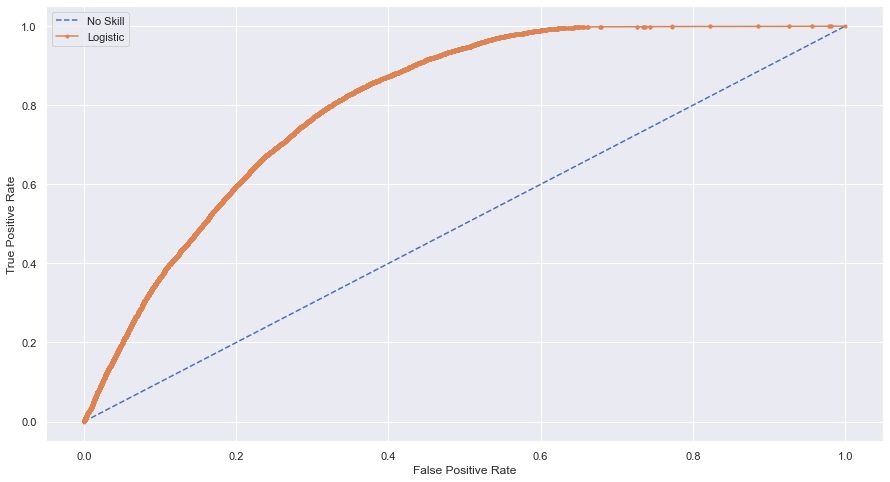

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
# Visualisation with plot_metric

# call the roc curve for the test data using the logistic prob. and the random prob.
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

plt.savefig("1.png") 


# show the plot
plt.show()

Can you comment on the results?

## Estimating a classification tree

We now implement a classification tree to forecast mortgage defaults. We implement two different procedures. 

- 1. Classification tree with **max_depth** fixed
- 2. Classificarion tree with **max_depth** estimated by k-fold cross validation. 

Ex 11: Let start with a simple classification tree:

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train, y_train)

# get the predicted prob. of the test sample
y_dt_pred = dt.predict(X_test)

print(metrics.confusion_matrix(y_test, y_dt_pred))

[[59954    16]
 [ 7819    30]]


Ex 12: Now compare the classification tree against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

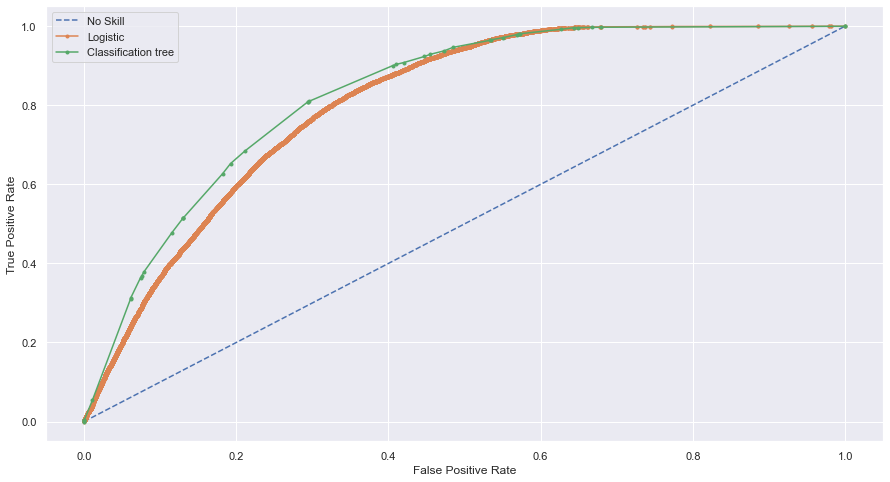

In [14]:
# generate the predicted probabilities from the logistic regression
dt_probs = dt.predict_proba(X_test)[:,1]

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Classification tree')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

plt.savefig("2.png") 

# show the plot
plt.show()

Can you comment on the results? 

Ex 13: Let now re-calculate a classification tree but with the **max_depth** and the **min_samples_leaf** parameters estimated by a 5-fold cross-validation method. 

In [18]:
dtree_cv = DecisionTreeClassifier()

params_dt = {'max_depth': [2,3,4,6],
             'min_samples_leaf': [1, 1.5, 2]}

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
dt_cv = GridSearchCV(estimator=dtree_cv,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,#cv: cross validation folds, i.e. dividing into how many folds
                       verbose=1,
                       n_jobs=-1)

dt_cv.fit(X_train, y_train)

y_dt_cv_pred = dt_cv.predict(X_test)

print(metrics.confusion_matrix(y_test, y_dt_cv_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.75694573        nan 0.75694573 0.78794505        nan 0.78794505
 0.80035897        nan 0.80034725 0.82399138        nan 0.82398956]
  warnings.warn(


[[59953    17]
 [ 7819    30]]


Ex 14: Now compare the classification tree with and without cross validation against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

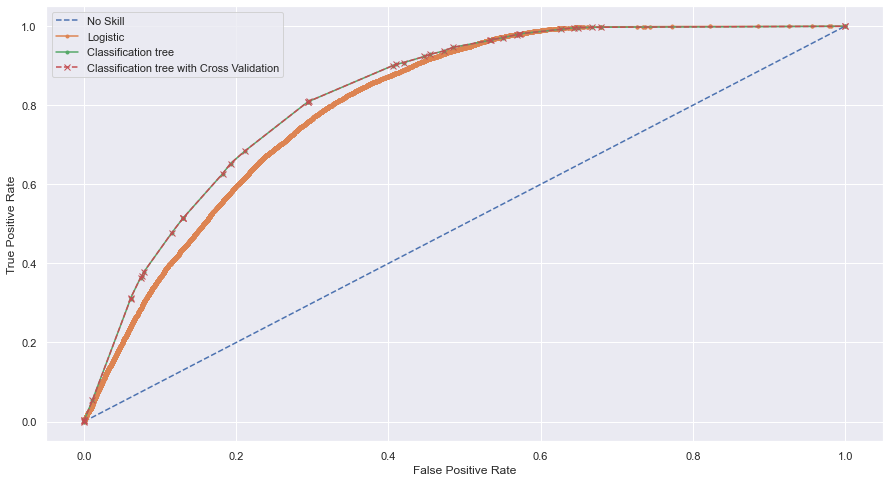

In [16]:
# generate the predicted probabilities from the logistic regression
dtcv_probs = dt_cv.predict_proba(X_test)[:,1]

dtcv_fpr, dtcv_tpr, _ = roc_curve(y_test, dtcv_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Classification tree')
plt.plot(dtcv_fpr, dtcv_tpr, linestyle='--', marker='x', label='Classification tree with Cross Validation')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

plt.savefig("3.png") 

# show the plot
plt.show()

Can you comment on the results?

## Estimating a random forest 

Ex 15: We now expand the set of models and include a random forest. The goal is to see if a more robust framework allows to have a more precise idea of the mortgage probability of default. Let us assume the number of estimators (**n_estimators**) equal to 10. 

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)

rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_rf_pred))

[[59455   515]
 [ 3978  3871]]


Ex 16: Now compare the random forest against the classification tree, with and without cross validation, the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

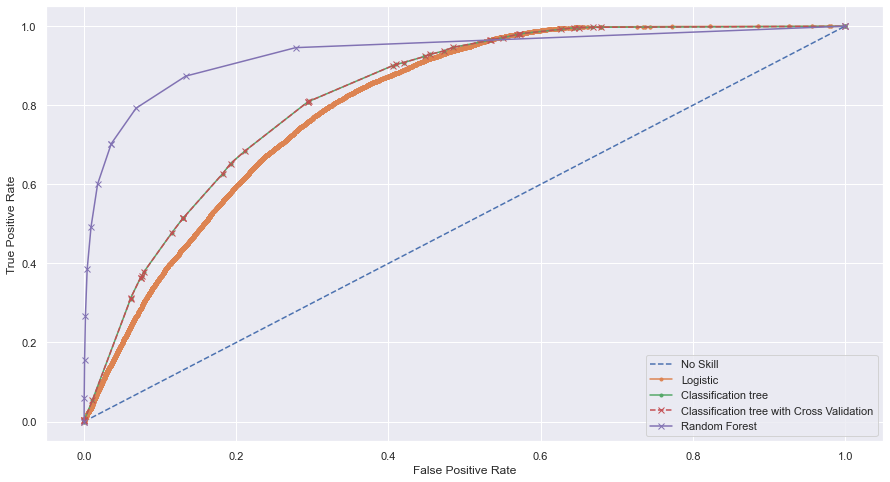

In [62]:
# generate the predicted probabilities from the logistic regression
rf_probs = rf.predict_proba(X_test)[:,1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rfm_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Classification tree')
plt.plot(dtcv_fpr, dtcv_tpr, linestyle='--', marker='x', label='Classification tree with Cross Validation')
plt.plot(rf_fpr, rf_tpr, marker='x', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

plt.savefig("4.png") 

# show the plot
plt.show()

Can you comment on the results?

Ex 17: Let us now look at the relative importance of each of the predictors used based on a *permutation importance* algorithm. 

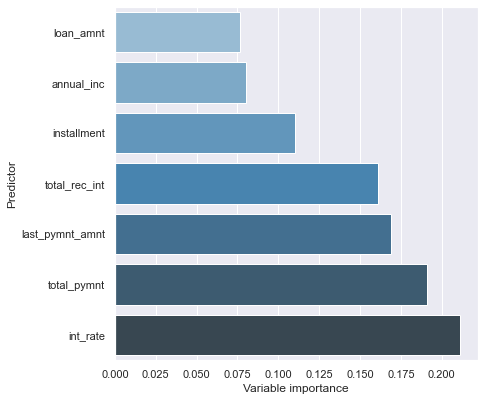

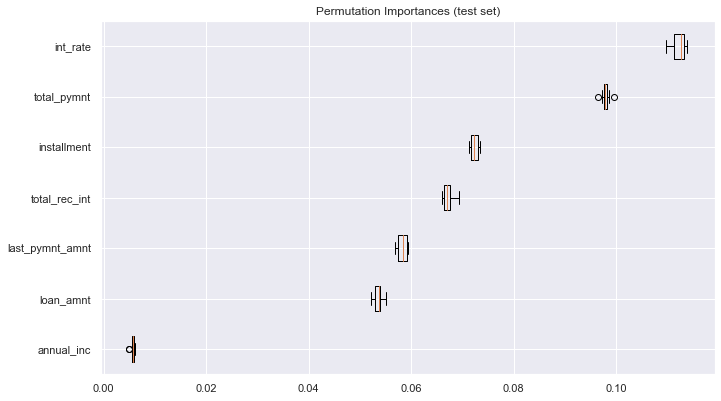

In [67]:
from sklearn.inspection import permutation_importance

#retrieve from the random forest the importance of the features; the higher the number, the higher its importance
tree_feature_importances = rf.feature_importances_

#create the sorted index index of the features importance from lowest to highest
sorted_idx = tree_feature_importances.argsort()

#create multi-dimensional array; one dimension with the sorted feature names and one with the sorted importance and then transpose it
df_1 = np.array([feature_names[sorted_idx], tree_feature_importances[sorted_idx]]).T

#convert the array into dataframe
df_1 = pd.DataFrame(df_1)

#rename the columns of the dataframe
df_1.columns = ['Predictor', 'Variable importance']

#defien the index of the dataframe
df_1.index = feature_names[sorted_idx]


sns.set_theme(color_codes=True)

#create a series of num that starts from zero and goes up to the length of the features_names variable
y_ticks = np.arange(0, len(feature_names))

fx, ax = plt.subplots(figsize = (6.5, 6.5))

ax = sns.barplot(x='Variable importance', y = 'Predictor', data = df_1, palette = 'Blues_d')

plt.savefig("variable_importance.png") 

#run the permutation importance for the random forest using the testing X and Y data
#n_repeat defines the num of times to permute a feature
#random_state allows to be able to replicate the results
#n_jobs defines the num of jobs to run in parallel (that refers to multi-processing)
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=20)

#sort the importances_mean from lowest to largest
#importances_mean is the average importance for the n_repeats
sorted_idx = result.importances_mean.argsort()

#define the figure size
fx, ax = plt.subplots(figsize=(11,6.5))

#create a boxplot using the sorted importances
#use for labels in the y-axis the namces of the testing X dataset
#vert allows to create a horizontal boxplot with lines going from left to right instead of being vertical
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_backup.columns[sorted_idx])

#define the general title of the boxplot
ax.set_title('Permutation Importances (test set)')
plt.savefig("permutation_importance.png") 
plt.show()

Can you comment on the results?